**Site para estudo de ML : https://www.kaggle.com/**
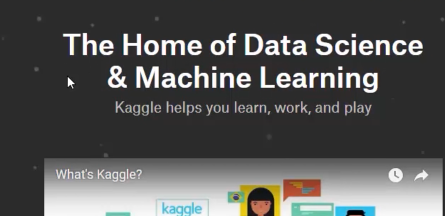



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#baixar os dados do site: https://www.kaggle.com/c/titanic
train=pd.read_csv('/content/train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info() #são 891 dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


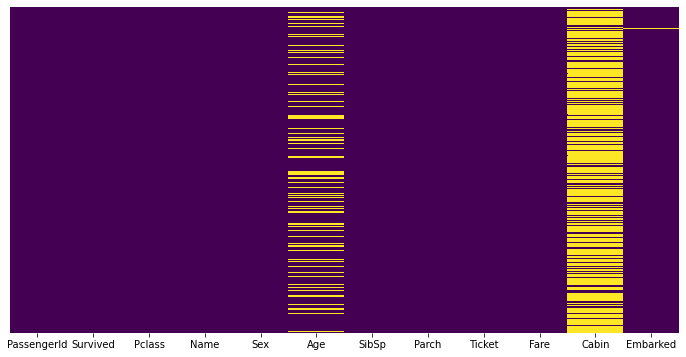

In [ ]:
#retorna true-null ou false- não null
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False, cbar= False, cmap='viridis')
#em amarelo são dados ausentes 

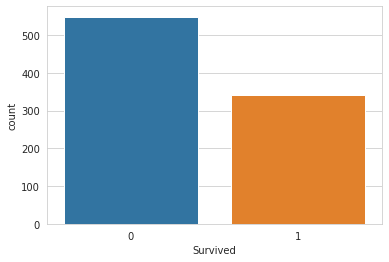

In [ ]:
#Analise exploratória dos dados para avaliar o melhor modelo para ser aplicado
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)
#mais dados de pessoas que não sobreviveram (0)

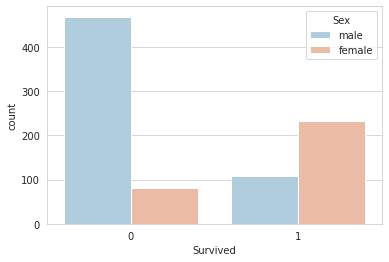

In [ ]:
#segregar os dados pela distribuição do sexo 
sns.countplot(x='Survived', data=train,hue='Sex', palette='RdBu_r')
#grande maioria que sobreviveu são mulheres 

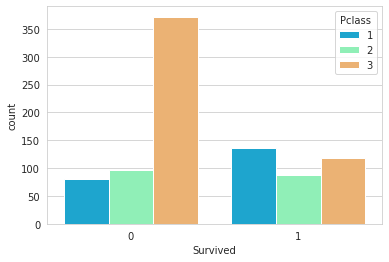

In [ ]:
#distribuição ao longo das classes 
sns.countplot(x='Survived', data=train,hue='Pclass', palette='rainbow')
#em termos de contagem de pessoas, o grupo sobrevivente tem uma distribuição semelhante em contagem de pessoas

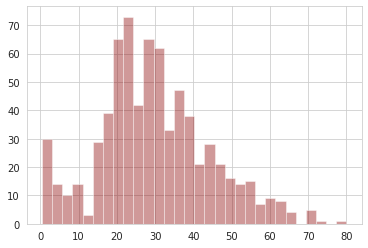

In [ ]:
#distribuição de idade de pessoas no titanic 
train['Age'].hist(bins=30,color='darkred', alpha=0.4)

#grande maioria era jovem 

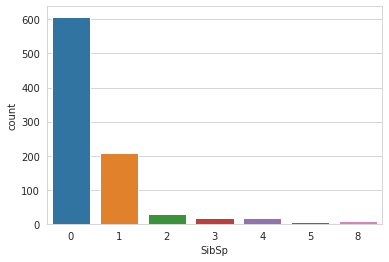

In [ ]:
#distribuição das pessoas que acompanhadas no navio 

sns.countplot(x='SibSp', data=train)
#grande maioria vinheram sozinhos ou veio com 1 companheiro

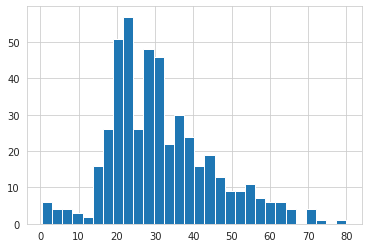

In [ ]:
#fazer um split dos dados para ver quando o 
train[train['SibSp']==0]['Age'].hist(bins=30)
#selecionamos quando os passageiros desacompanhados(SibSp=0) e pegamos a idade e fizemos o histograma 
#pessoas mais jovens tem acompanhante e o resto se mantem semelhante com o grafico anterior

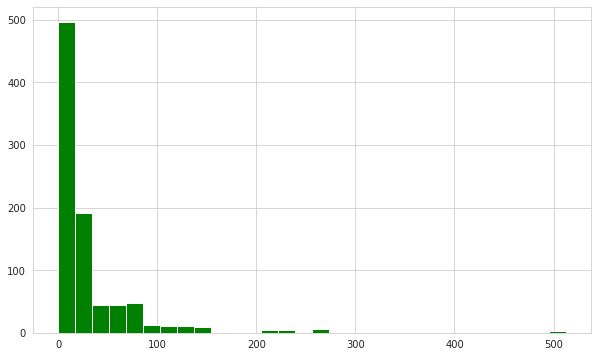

In [ ]:
#distribuição dos preços dos tickets 
train['Fare'].hist(bins=30,color='green',figsize=(10,6))

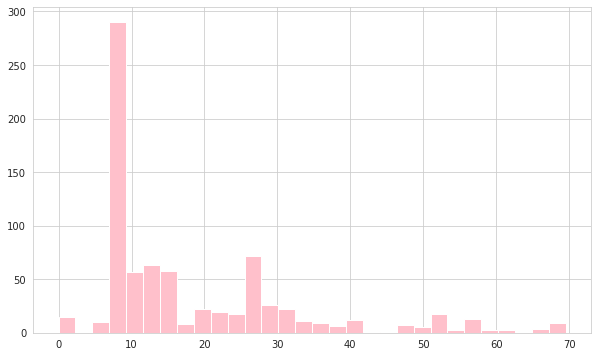

In [ ]:
#visualizar valores <70 
train[train['Fare']<70]['Fare'].hist(bins=30,color='pink',figsize=(10,6))
#grande maioria pagou uns 7 dolares -> não foi corrigido por inflação

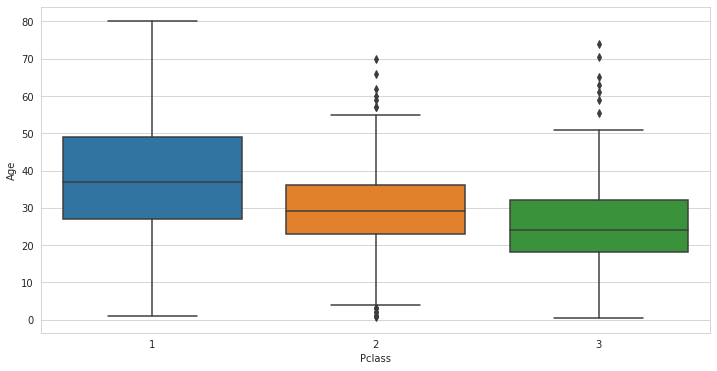

In [ ]:
#TRATAMENTO DOS DADOS FALTANTES
#idade- como estão as distribuições de idade por classe para tratar os dados faltantes
plt.figure(figsize=(12,6))

sns.boxplot(x='Pclass', y='Age', data=train)
#pessoas de classe mais alta(1)- são mais velhas, classe 2- media de 29 anos e 3 classe-29 a 25 anos 

In [ ]:
#formas de tratar esses dados faltantes
#preencher as idadades de acordo com a média de idade das classes
#teste para ver se a idade é null e fazer a média de idade de acordo com a classe 
def imputar_idade(cols):
  idade=cols[0]
  classe=cols[1]
  if pd.isnull(idade):
    if classe ==1:
      return 37
    elif classe ==2:
        return 29
    else: 
        return 24
  else:
      return idade


In [ ]:
#a coluna age será substituida como age(col1) e class(col2)
train['Age'] = train[['Age','Pclass']].apply(imputar_idade, axis=1)  

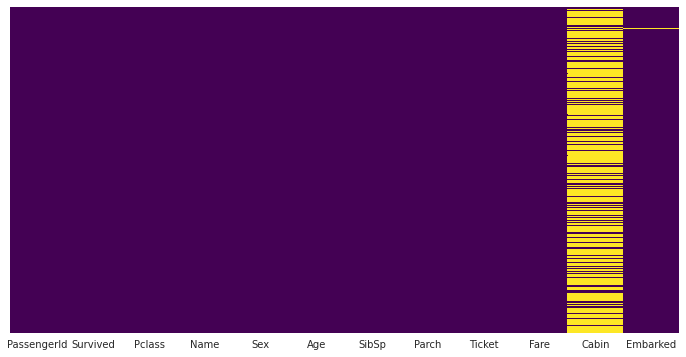

In [ ]:
train['Age'] #--> não há mais dados faltantes
#retorna true-null ou false- não null
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False, cbar= False, cmap='viridis')
#em amarelo são dados ausentes 

In [ ]:
#CABINE 
#muitas informações faltantes, então essa coluna deve ser descartada

del train['Cabin']
#train.drop('Cabin',inplace=True)

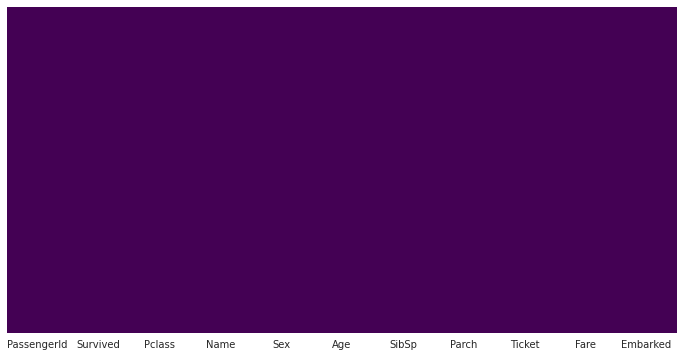

In [ ]:

plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False, cbar= False, cmap='viridis')
#em amarelo são dados ausentes 

In [ ]:
#EMBARCADOS
# tb deve ser apagada
train.dropna(inplace=True) #=>1 apagaria a coluna, mas queremos linha

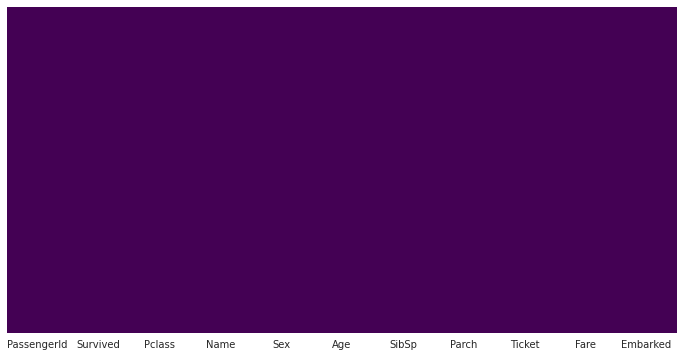

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False, cbar= False, cmap='viridis')
#em amarelo são dados ausentes 

In [ ]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,29,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,37,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,37,0,0,111369,30.0000,C


In [ ]:
#como trabalhar com variaveis categorias que podem virar numeros
sex= pd.get_dummies(train['Sex'],drop_first=True) #->transformou a coluna sexo em uma unica coluna (drop_first) 

In [ ]:
train['Embarked'].value_counts()
#tem 3 possibilidades de embarque 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
embark= pd.get_dummies(train['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
#vamos excluir algumas coilunas irrelevantes para o modelo
#apagar nas colunas(axis=1) e fazer direto no df(inplace=true)
train.drop(['Sex','PassengerId','Name','Ticket'],axis=1, inplace=True)
#aqui eu rodei 2x por isso deu erro hehe 

In [ ]:
del train['Embarked']

In [ ]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24,1,0,7.2500,1,0,1
1,1,1,37,1,0,71.2833,0,0,0
2,1,3,24,0,0,7.9250,0,0,1
3,1,1,37,1,0,53.1000,0,0,1
4,0,3,24,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,29,0,0,13.0000,1,0,1
887,1,1,37,0,0,30.0000,0,0,1
888,0,3,24,1,2,23.4500,0,0,1
889,1,1,37,0,0,30.0000,1,0,0


In [ ]:
#CONSTRUÇÃO DO MODELO concatenado dados especificados por linhas
train= pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head(15)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,24,1,0,7.2500,1,0,1,1,0,1
1,1,1,37,1,0,71.2833,0,0,0,0,0,0
2,1,3,24,0,0,7.9250,0,0,1,0,0,1
3,1,1,37,1,0,53.1000,0,0,1,0,0,1
4,0,3,24,0,0,8.0500,1,0,1,1,0,1
5,0,3,24,0,0,8.4583,1,1,0,1,1,0
6,0,1,37,0,0,51.8625,1,0,1,1,0,1
7,0,3,24,3,1,21.0750,1,0,1,1,0,1
8,1,3,24,0,2,11.1333,0,0,1,0,0,1
9,1,2,29,1,0,30.0708,0,0,0,0,0,0


In [ ]:
#CALIBRAR O MODELOS- vamos importar a classe de modelo 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#separar dados de treino e de teste 
#drop  estamos excluindo survived no modelo na coluna (inplace=false não exclui definitivamente)
# modelo classifica se a pessoa sobreviveu ou não de acordo com os outros parâmetros
X_train, X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=.3)

In [ ]:
#utilizar os conjuntos de dados para fazer o fit

logmodel= LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions= logmodel.predict(X_test) #previsão a partir dos inputs dos testes e calcular os valores que o modelo diz que e verdade

In [ ]:
print(classification_report(y_test,predictions))# avaliação do modelo se é bom ou não,
# estatisticas da previsão do modelo (precicion72% dos casos acertou quem faleceu)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       151
           1       0.67      0.62      0.64       116

    accuracy                           0.70       267
   macro avg       0.69      0.69      0.69       267
weighted avg       0.70      0.70      0.70       267



In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix


In [ ]:
print(confusion_matrix(y_test,predictions)) 

[[115  36]
 [ 44  72]]
